In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [47]:
dataset = pd.read_excel("ClickStream_C3.xlsx")
dataset.head()
type(dataset)
print(dataset.columns.values)

['ip' 'login_or_not' '#page_view' 'page_view_time_seconds_avg'
 '#page_product_view' 'page_product_time_avg' 'number_searches'
 '#times_check_shoppingcart' 'read_Q&A' 'read_product_definition'
 'previous_site' 'time_of_day' 'purchase']


In [39]:
#assigning the value of purchase status (0 or 1) to a variable
target = (dataset.iloc[:, 12].values)
#remove the column with purchase information
dataset.drop(['purchase'], axis=1)


,ip,login_or_not,#page_view,page_view_time_seconds_avg,#page_product_view,page_product_time_avg,number_searches,#times_check_shoppingcart,read_Q&A,read_product_definition,previous_site,time_of_day
0,1872847644,0,1,0.000000,0,0.000000,0,0,1,0,1,4
1,2099712166,0,1,0.000000,0,0.000000,0,0,0,1,2,3
2,2916141994,0,4,375.250000,0,0.000000,0,0,1,0,5,4
3,3029974007,0,7,16.369881,0,0.000000,0,0,1,1,5,1
4,3059224150,0,18,33.722222,7,26.714286,2,1,0,0,5,3
5,1872847536,0,1,0.000000,0,0.000000,0,0,1,0,1,1
6,1987245356,0,6,36.333333,0,0.000000,2,0,0,0,2,3
7,3031266868,0,4,118.000000,0,0.000000,0,0,0,0,1,3
8,1971858436,0,1,0.000000,0,0.000000,0,0,0,1,2,3
9,2071789993,0,1,0.000000,0,0.000000,0,0,0,0,5,1


In [40]:
target_val = np.array(target)
data = np.array(dataset)

In [41]:
#Start with purchase value to be one
select_index = target_val ==1

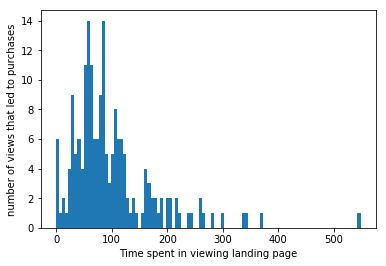

In [48]:
purc_time = data[select_index,:]
bins=100
plt.hist(purc_time[:,3], bins) #time spent by people  who purchased only


plt.xlabel("Time spent in viewing landing page")
plt.ylabel("number of views that led to purchases")
plt.show()

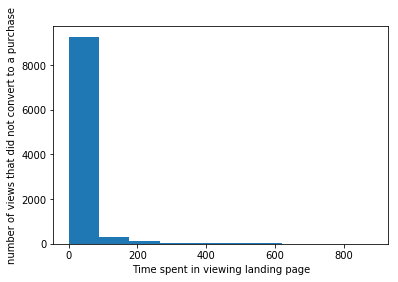

In [55]:
NoPurc_time = data[target_val ==0,:]
plt.hist(NoPurc_time[:,3])
plt.xlabel("Time spent in viewing landing page")
plt.ylabel("number of views that did not convert to a purchase")
plt.show()

In [21]:
mean_page_view = np.mean(data[:,2])
median_page_view = np.median(data[:,2])
std_dev_page_view = np.std(data[:,2])

In [22]:
print (mean_page_view)
print (median_page_view)
print (std_dev_page_view)

3.1267
1.0
6.586155715590089


In [23]:
from scipy import stats

In [24]:
stat1 = stats.describe(data[:,2])
stat2 = stats.describe(data[:,3])
stat3 = stats.describe(data[:,4])
stat4 = stats.describe(data[:,5])
stat5 = stats.describe(data[:,6])
stat6 = stats.describe(data[:,7])

In [25]:
print(stat1)
print(stat2)
print(stat3)
print(stat4)
print(stat5)
print(stat6)

DescribeResult(nobs=10000, minmax=(1.0, 216.0), mean=3.1267, variance=43.381785288528846, skewness=10.41421060949879, kurtosis=195.70869847825935)
DescribeResult(nobs=10000, minmax=(0.0, 884.7458333), mean=20.219662378954897, variance=4408.111203627734, skewness=5.933023338264963, kurtosis=43.829671954984164)
DescribeResult(nobs=10000, minmax=(0.0, 71.0), mean=0.3328, variance=2.99854401440144, skewness=18.227146227120357, kurtosis=544.2918330107741)
DescribeResult(nobs=10000, minmax=(0.0, 1844.0), mean=11.143860077465499, variance=4465.668799995028, skewness=10.76786722800841, kurtosis=164.76240796863976)
DescribeResult(nobs=10000, minmax=(0.0, 43.0), mean=0.3941, variance=2.5514403340334026, skewness=9.629140240446727, kurtosis=149.0035811332939)
DescribeResult(nobs=10000, minmax=(0.0, 19.0), mean=0.0305, variance=0.22739248924892497, skewness=24.39522679858299, kurtosis=739.2858942271167)


In [26]:
mean_page_view_time = np.mean(data[:,3])
median_page_view_time = np.median(data[:,3])
std_dev_page_view_time = np.std(data[:,3])

In [27]:
mean_prod_view = np.mean(data[:,4])
median_prod_view = np.median(data[:,4])
std_dev_prod_view = np.std(data[:,4])

In [28]:
mean_prod_view_time = np.mean(data[:,5])
median_prod_view_time = np.median(data[:,5])
std_dev_prod_view_time = np.std(data[:,5])

In [29]:
mean_search = np.mean(data[:,6])
median_search = np.median(data[:,6])
std_dev_search = np.std(data[:,6])

In [30]:
mean_chk_cart = np.mean(data[:,7])
median_chk_cart = np.median(data[:,7])
std_dev_chk_cart = np.std(data[:,7])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2386ac18>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23876518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2386aac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23876d68>],
 'fliers': [],
 'means': []}

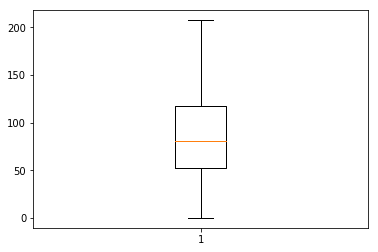

In [31]:
#data[:,3].plot(kind='box', figsize=[16,8])
plt.boxplot(data[select_index,3], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x114dadef0>,
 'caps': [<matplotlib.lines.Line2D at 0x12107a668>,
 'boxes': [<matplotlib.lines.Line2D at 0x114dadcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x114daf240>],
 'fliers': [],
 'means': []}

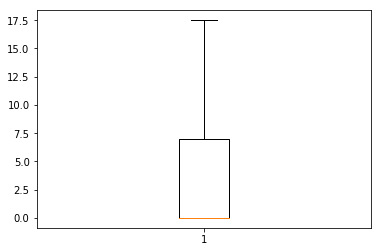

In [32]:
#data[:,3].plot(kind='box', figsize=[16,8])
plt.boxplot(data[target_val ==0,3], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x120ffe748>,
 'caps': [<matplotlib.lines.Line2D at 0x121009748>,
 'boxes': [<matplotlib.lines.Line2D at 0x120ffec50>],
 'medians': [<matplotlib.lines.Line2D at 0x121009908>],
 'fliers': [],
 'means': []}

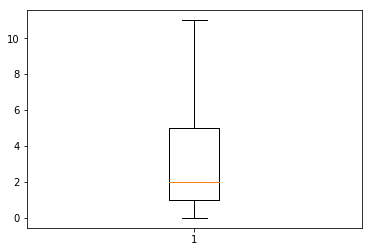

In [33]:
plt.boxplot(data[select_index,4], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x121050860>,
 'caps': [<matplotlib.lines.Line2D at 0x12105a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x121050630>],
 'medians': [<matplotlib.lines.Line2D at 0x12105a588>],
 'fliers': [],
 'means': []}

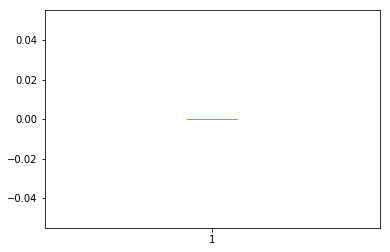

In [34]:
plt.boxplot(data[target_val ==0,4], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x2027efebeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x2027eff47b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2027efebd68>],
 'medians': [<matplotlib.lines.Line2D at 0x2027effe048>],
 'fliers': [],
 'means': []}

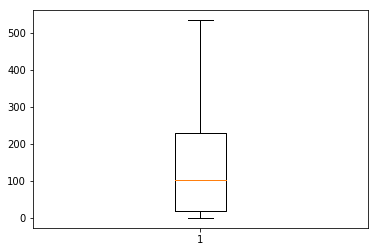

In [107]:
plt.boxplot(data[select_index,5], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x2027ef4b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2027ef4bf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2027ef4b550>],
 'medians': [<matplotlib.lines.Line2D at 0x2027ef567f0>],
 'fliers': [],
 'means': []}

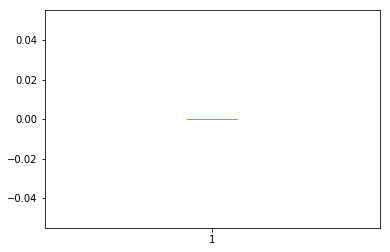

In [106]:
plt.boxplot(data[target_val ==0,5], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x2027ea56ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x2027e9a87f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2027ea56da0>],
 'medians': [<matplotlib.lines.Line2D at 0x2027e983080>],
 'fliers': [],
 'means': []}

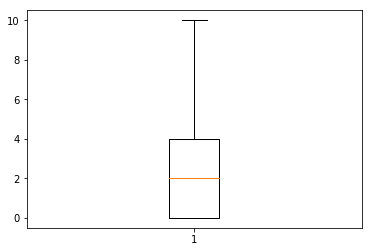

In [96]:
plt.boxplot(data[select_index,6], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x2027f427390>,
 'caps': [<matplotlib.lines.Line2D at 0x2027f427c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2027f427240>],
 'medians': [<matplotlib.lines.Line2D at 0x2027f4314e0>],
 'fliers': [],
 'means': []}

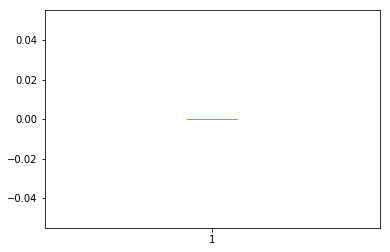

In [104]:
plt.boxplot(data[target_val ==0,6], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x2027f083e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2027f08a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2027f083cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2027f08af60>],
 'fliers': [],
 'means': []}

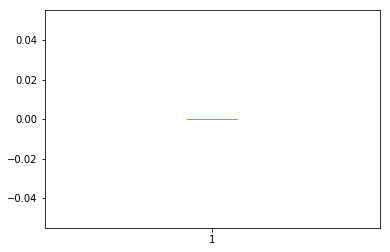

In [108]:
plt.boxplot(data[select_index,7], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x2027eef5d30>,
 'caps': [<matplotlib.lines.Line2D at 0x2027eeff630>,
 'boxes': [<matplotlib.lines.Line2D at 0x2027eef5be0>],
 'medians': [<matplotlib.lines.Line2D at 0x2027eeffe80>],
 'fliers': [],
 'means': []}

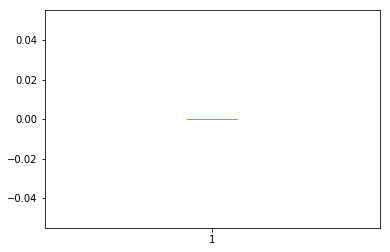

In [105]:
plt.boxplot(data[target_val ==0,7], 0, '')